## Họ và tên: Nguyễn Mạnh Niên
## Mã sinh viên: 2022601951
## Lớp: 2022601951

In [1]:
# Cài đặt các thư viện cần thiết
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Loại bỏ các cảnh báo
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
# Khai báo các giá trị tham số cố định
PATH_FILE       = '/kaggle/input/dataframe/pc2.csv' # Đường dẫn đến file dữ liệu
RANDOM_STATE    = 42                # Dùng trong chia dữ liệu
TEST_SIZE       = 0.25              # Dùng trong chia dữ liệu
K_FOLD          = 10                # Dùng trong đánh giá kiểm định chéo
CV              = 5                 # Dùng trong quá trình tìm kiếm tham số tốt nhất
DPI             = 200               # Độ phân giải cho biểu đồ

In [3]:
# Đọc dữ liệu sử dụng pandas
try:
    # Đọc file CSV
    df = pd.read_csv(PATH_FILE,
                     header = None, 
                     sep = ',',
                     skipinitialspace = True)
    print('Đọc file thành công!')
    print(df.head(5))   # In ra 5 dòng đầu tiên
except FileNotFoundError:
    print(f"Lỗi: File '{PATH_FILE}' không tồn tại.")
except Exception:
    print(f"Lỗi {Exception}.")

Đọc file thành công!
   0   1   2   3   4   5     6   7    8   9   ...  27    28  29  30  31  32  \
0   1   0   0   0   0   1  1.00   0  0.0   1  ...   2  0.50   1   3   1   3   
1   1   1   0   0   0   1  1.00   0  0.0   1  ...   3  1.00   1   0   1   0   
2   1   4   7  24   0   1  0.13   0  0.0   1  ...   7  0.03  13  21   7   8   
3   1   1  11   3   0   1  0.08   0  0.0   1  ...   3  0.06  29  48  13   7   
4   1   1   0   0   0   1  1.00   0  0.0   1  ...   3  0.33   5   4   4   1   

   33     34  35     36  
0   2   0.00   0  False  
1   1   0.00   0  False  
2  34  96.88   8  False  
3  17  93.33  12  False  
4   3   0.00   1  False  

[5 rows x 37 columns]


#### Kiểm tra thông tin dữ liệu

In [4]:
# Kiểm tra xem dữ liệu có bị thiếu hay không
check_nan = df.isna().any().any()
if check_nan == True:
    print("Dữ liệu bị thiếu!")
else:
    print("Dữ liệu đầy đủ!")

Dữ liệu đầy đủ!


36
False    5566
True       23
Name: count, dtype: int64


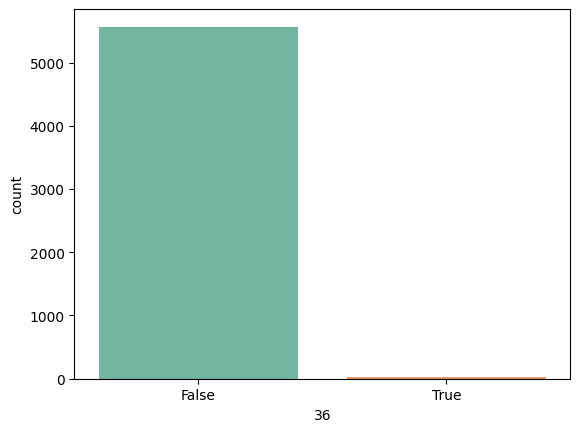

In [5]:
# Kiểm tra tính cân bằng của nhãn
print(df[36].value_counts())
sns.countplot(data=df, x = 36, palette='Set2');

#### Tiền xử lý dữ liệu

In [6]:
# Chuyển đổi các thuộc tính dạng ký tự sang số
Le = LabelEncoder()
df[36] = Le.fit_transform(df[36])

In [7]:
# Chuẩn hóa Min-Max
# Lấy dữ liệu chuẩn hóa từ DataFrame
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

# Chuẩn hóa dữ liệu
scaler  = MinMaxScaler()
df_X    = scaler.fit_transform(df_X)

#### Chuẩn bị dữ liệu huấn luyện

In [8]:
# Đánh giá theo phương pháp chia tỷ lệ
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE)

# Kiểm tra chiều dữ liệu
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4191, 36)
(1398, 36)
(4191,)
(1398,)


#### Huấn luyện mô hình

In [9]:
# Khởi tạo mô hình
clf = GaussianNB()

# Huấn luyện mô hình
start_time = time.time()
clf.fit(X_train, y_train)
execution_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình: {execution_time:.5f} giây.")

# Dự đoán mô hình
y_pred = clf.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.5f}%.")

Thời gian huấn luyện mô hình: 0.00507 giây.
Độ chính xác của mô hình: 96.06581%.


#### Đánh giá kết quả

In [10]:
# True Possitive
TP = np.sum((y_test == 0) & (y_pred == 0))
# False Possitive
FP = np.sum((y_test == 1) & (y_pred == 0))
# False Negative
FN = np.sum((y_test == 0) & (y_pred == 1))
# True Negative
TN = np.sum((y_test == 1) & (y_pred == 1))

print("{:<18}:  {:>5}".format('True Possitive', TP))
print("{:<18}:  {:>5}".format('True Negative', TN))
print("{:<18}:  {:>5}".format('False Possitive', FP))
print("{:<18}:  {:>5}".format('False Negative', FN))

# Tính các giá trị precision, recall, f1-score
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1Score   = 2 * (precision * recall) / (precision + recall)
print("{:<18}:  {:>5.5f}".format('Precision', precision))
print("{:<18}:  {:>5.5f}".format('Recall', recall))
print("{:<18}:  {:>5.5f}".format('f1-score', f1Score))

True Possitive    :   1340
True Negative     :      3
False Possitive   :      3
False Negative    :     52
Precision         :  0.99777
Recall            :  0.96264
f1-score          :  0.97989


#### Xây dựng mô hình SVM và KNN

In [11]:
# SVM

# Khởi tạo mô hình
clf_svm = SVC()
# Huấn luyện mô hình
start_time = time.time()
clf_svm.fit(X_train, y_train)
execution_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình svm: {execution_time:.5f} giây.")

# Dự đoán mô hình
y_pred_svm = clf_svm.predict(X_test)

# Đánh giá mô hình
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Độ chính xác của mô hình svm: {accuracy_svm * 100:.5f}%.")


# KNN
# Khởi tạo mô hình
clf_knn = KNeighborsClassifier()
# Huấn luyện mô hình
start_time = time.time()
clf_knn.fit(X_train, y_train)
execution_time = time.time() - start_time
print(f"Thời gian huấn luyện mô hình knn: {execution_time:.5f} giây.")

# Dự đoán mô hình
y_pred_knn = clf_knn.predict(X_test)

# Đánh giá mô hình
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Độ chính xác của mô hình knn: {accuracy_knn * 100:.5f}%.")

Thời gian huấn luyện mô hình svm: 0.02931 giây.
Độ chính xác của mô hình svm: 99.57082%.
Thời gian huấn luyện mô hình knn: 0.00109 giây.
Độ chính xác của mô hình knn: 99.57082%.


#### Sử dụng GridSearchCV để tìm kiếm 1 bộ tham số cho mô hình SVM

In [12]:
# Khởi tạo lưới tham số
grid_parameters_svm = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],    # Các dạng hàm kernel
    'C'      : [0, 0.1, 1, 10, 100],                    # Tham số phạt của mô hình
    'coef0'  : [1, 2, 3, 4],                            # Tham số gamma của đa thức
    'degree' : [1, 2, 3, 4]                             # Bậc của đa thức
}

In [13]:
# Tìm kiếm tham số
gridSearch_svm = GridSearchCV(estimator     = clf_svm, 
                              param_grid    = grid_parameters_svm, 
                              scoring       = 'accuracy',
                              cv            = CV,
                              verbose       = 2,
                              refit         = True)
gridSearch_svm.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END ................C=0, coef0=1, degree=1, kernel=poly; total time=   0.0s
[CV] END ................C=0, coef0=1, degree

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.1, 1, 10, 100], 'coef0': [1, 2, 3, 4],
                         'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [14]:
# Đưa ra tham số tốt nhất và độ chính xác cao nhất khi dùng GridSearchCV

# In ra bộ tham số tham số tốt nhất
best_params_svm = gridSearch_svm.best_params_
print(f"Bộ tham số tốt nhất của mô hình svm: {best_params_svm}.")

# In ra độ chính xác cao nhất của mô hình
print(f"Độ chính xác cao nhất của mô hình svm: {gridSearch_svm.best_score_ * 100:.5f}%.")

Bộ tham số tốt nhất của mô hình svm: {'C': 0.1, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}.
Độ chính xác cao nhất của mô hình svm: 99.61825%.


### Sử dụng GridSearchCV để tìm kiếm 1 bộ tham số cho mô hình KNNM

In [15]:
# Khởi tạo lưới tham số
grid_parameters_knn = {
    'n_neighbors': [3, 5, 7, 9],                       # Số lượng láng giềng
    'weights': ['uniform', 'distance'],                # Trọng số
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Hàm khoảng cách
}

# Tìm kiếm tham số
gridSearch_knn = GridSearchCV(estimator     = clf_knn, 
                              param_grid    = grid_parameters_knn, 
                              scoring       = 'accuracy',
                              cv            = CV,
                              verbose       = 2,
                              refit         = True)
gridSearch_knn.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [16]:
# In ra bộ tham số tốt nhất
best_params_knn = gridSearch_knn.best_params_
print(f"Bộ tham số tốt nhất của mô hình: {best_params_knn}")

# in ra độ chính xac cao nhất của mô hình
print(f"Độ chính xác cao nhất của mô hình: {gridSearch_knn.best_score_}")

Bộ tham số tốt nhất của mô hình: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Độ chính xác cao nhất của mô hình: 0.9959438586110867


In [20]:
# Khởi tạo hàm kiểm định chéo
kf = KFold(n_splits = K_FOLD, 
           shuffle = True, 
           random_state = RANDOM_STATE)

accuracies_svm = []
precisions_svm = []
recalls_svm    = []
f1_scores_svm  = []
times_svm = []
accuracies_knn = []
precisions_knn = []
recalls_knn    = []
f1_scores_knn  = []
times_knn = []

i = 1

for train_index, test_index in kf.split(df_X):

    # Chia dữ liệu thành training và testing
    X_train, X_test = df_X[train_index], df_X[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

    print(X_train.shape)
    print(X_test.shape)

    # Khởi tạo mô hình SVM
    start_time = time.time()
    clf_svm = SVC()

    # Huấn luyện mô hình
    clf_svm.fit(X_train, y_train)
    finish_svm = time.time() - start_time

    # Dự đoán mô hình
    y_pred_svm = clf_svm.predict(X_test)

    # Khởi tạo mô hình KNN
    start_time = time.time()
    clf_knn = KNeighborsClassifier()

    # Huấn luyện mô hình
    clf_knn.fit(X_train, y_train)
    finish_knn = time.time() - start_time

    # Dự đoán mô hình
    y_pred_knn = clf_knn.predict(X_test)

    # Đưa ra độ chính xác của mô hình
    accuracy_svm  = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm    = recall_score(y_test, y_pred_svm)
    f1Score_svm   = f1_score(y_test, y_pred_svm)

    # In ra kết quả
    print(f'FOLD: {i}')
    print('{:<15} : {:>5.5f}'.format("Accuracy SVM", accuracy_svm *100))
    print('{:<15} : {:>5.5f}'.format("Precision SVM", precision_svm))
    print('{:<15} : {:>5.5f}'.format("Recall SVM", recall_svm))
    print('{:<15} : {:>5.5f}'.format("F1-Score SVM", f1Score_svm))
    print('{:<15} : {:>5.5f}'.format("Time SVM", finish_svm))
    print()

    # Đưa ra độ chính xác của mô hình
    accuracy_knn  = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn)
    recall_knn    = recall_score(y_test, y_pred_knn)
    f1Score_knn   = f1_score(y_test, y_pred_knn)

    # In ra kết quả
    print('{:<15} : {:>5.5f}'.format("Accuracy KNN", accuracy_knn *100))
    print('{:<15} : {:>5.5f}'.format("Precision KNN", precision_knn))
    print('{:<15} : {:>5.5f}'.format("Recall KNN", recall_knn))
    print('{:<15} : {:>5.5f}'.format("F1-Score KNN", f1Score_knn))
    print('{:<15} : {:>5.5f}'.format("Time KNN", finish_knn))
    print("=========================================================")

    # Append vào các mảng
    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1Score_svm)
    times_svm.append(finish_svm)
    accuracies_knn.append(accuracy_knn)
    precisions_knn.append(precision_knn)
    recalls_knn.append(recall_knn)
    f1_scores_knn.append(f1Score_knn)
    times_knn.append(finish_knn)

    i = i + 1

(5030, 36)
(559, 36)
FOLD: 1
Accuracy SVM    : 99.46333
Precision SVM   : 0.00000
Recall SVM      : 0.00000
F1-Score SVM    : 0.00000
Time SVM        : 0.04126

Accuracy KNN    : 99.46333
Precision KNN   : 0.00000
Recall KNN      : 0.00000
F1-Score KNN    : 0.00000
Time KNN        : 0.00097
(5030, 36)
(559, 36)
FOLD: 2
Accuracy SVM    : 99.82111
Precision SVM   : 0.00000
Recall SVM      : 0.00000
F1-Score SVM    : 0.00000
Time SVM        : 0.03778

Accuracy KNN    : 99.82111
Precision KNN   : 0.00000
Recall KNN      : 0.00000
F1-Score KNN    : 0.00000
Time KNN        : 0.00087
(5030, 36)
(559, 36)
FOLD: 3
Accuracy SVM    : 99.64222
Precision SVM   : 0.00000
Recall SVM      : 0.00000
F1-Score SVM    : 0.00000
Time SVM        : 0.03883

Accuracy KNN    : 99.64222
Precision KNN   : 0.00000
Recall KNN      : 0.00000
F1-Score KNN    : 0.00000
Time KNN        : 0.00085
(5030, 36)
(559, 36)
FOLD: 4
Accuracy SVM    : 99.46333
Precision SVM   : 0.00000
Recall SVM      : 0.00000
F1-Score SVM    

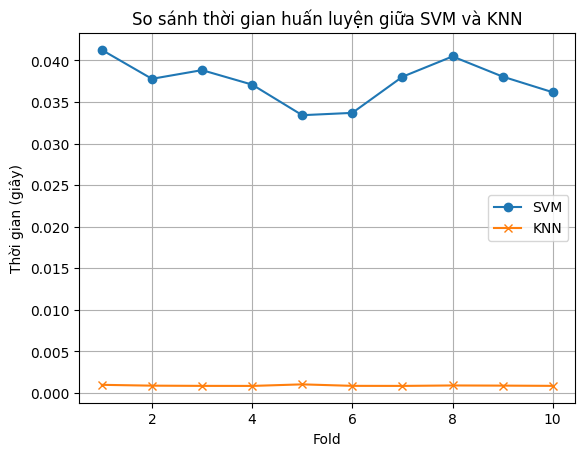

In [22]:
# Vẽ biểu đồ
plt.plot(range(1, K_FOLD + 1), times_svm, marker='o', label='SVM')
plt.plot(range(1, K_FOLD + 1), times_knn, marker='x', label='KNN')
plt.xlabel('Fold')
plt.ylabel('Thời gian (giây)')
plt.title('So sánh thời gian huấn luyện giữa SVM và KNN')
plt.legend()
plt.grid(True)
plt.show()

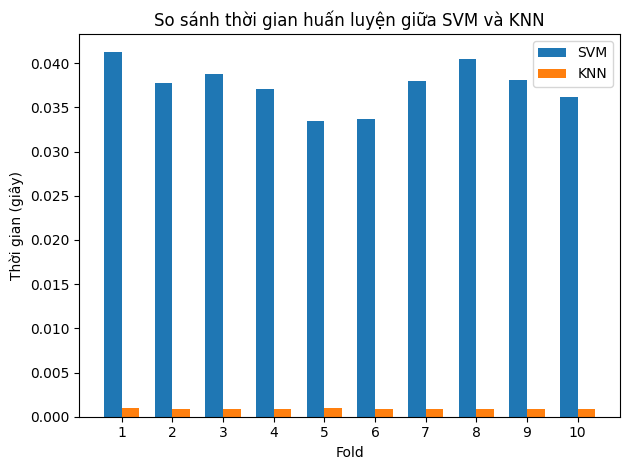

In [23]:
# Tạo dữ liệu cho biểu đồ cột
folds = np.arange(1, K_FOLD + 1)
width = 0.35  # Độ rộng của cột

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
rects1 = ax.bar(folds - width/2, times_svm, width, label='SVM')
rects2 = ax.bar(folds + width/2, times_knn, width, label='KNN')

# Đặt nhãn cho các trục và tiêu đề cho biểu đồ
ax.set_ylabel('Thời gian (giây)')
ax.set_xlabel('Fold')
ax.set_title('So sánh thời gian huấn luyện giữa SVM và KNN')
ax.set_xticks(folds)
ax.legend()

fig.tight_layout()
plt.show()